# Drug dataset

* all predictors except for the review column, rating pre-engineered

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
pd.set_option('max_columns', None)

pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [3]:
df = pd.read_csv("drugs_df_for_lin_reg.csv")

In [4]:
df.drop(["Unnamed: 0", "drugName"], axis=1, inplace=True)

In [5]:
df

,condition_clean,usefulCount,length,rating
0,Left Ventricular Dysfunction,27,17,9
1,ADHD,192,141,8
2,Birth Control,17,134,5
3,Birth Control,10,89,8
4,Opiate Dependence,37,124,9
...,...,...,...,...
215058,"Breast Cancer, Prevention",43,97,10
215059,Anxiety,11,130,9
215060,Birth Control,7,149,8
215061,Pain,20,34,1


In [6]:
corr = df.corr("spearman")
corr

,usefulCount,length,rating
usefulCount,1.0000,-0.0279,0.2811
length,-0.0279,1.0000,0.0041
rating,0.2811,0.0041,1.0000


<AxesSubplot:>

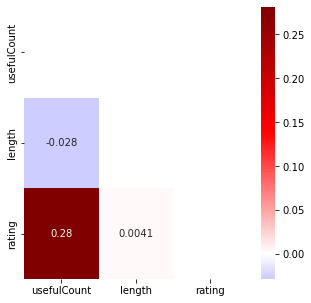

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,
            cmap='seismic',
            mask=mask,
            center=0,
            annot=True,
            ax=ax)

In [8]:
condition_dummies = pd.get_dummies(df["condition_clean"], drop_first=True)
condition_dummies

,AIDS Related Wasting,AV Heart Block,Abdominal Distension,Abnormal Uterine Bleeding,Abortion,Acetaminophen Overdose,Acne,Actinic Keratosis,Acute Coronary Syndrome,Acute Lymphoblastic Leukemia,Acute Nonlymphocytic Leukemia,Acute Otitis Externa,Acute Promyelocytic Leukemia,Addison's Disease,Adrenocortical Insufficiency,Adult Human Growth Hormone Deficiency,Aggressive Behavi,Agitated State,Agitation,Alcohol Dependence,Alcohol Withdrawal,Allergic Reactions,Allergic Rhinitis,Allergic Urticaria,Allergies,Alopecia,Alpha-1 Proteinase Inhibitor Deficiency,Alzheimer's Disease,Amebiasis,Amenorrhea,Amyotrophic Lateral Sclerosis,Anal Fissure and Fistula,Anal Itching,Anaphylaxis,Anaplastic Astrocytoma,Anaplastic Oligodendroglioma,Androgenetic Alopecia,Anemia,Anemia Associated with Chronic Renal Failure,"Anemia, Chemotherapy Induced","Anemia, Sickle Cell",Anesthesia,Anesthetic Adjunct,Angina,Angina Pectoris Prophylaxis,Angioedema,Ankylosing Spondylitis,Anorexia,Anorexia/Feeding Problems,Anthrax,Anti NMDA Receptor Encephalitis,Antiphospholipid Syndrome,Anxiety,Anxiety and Stress,Aphthous Ulce,Aplastic Anemia,Arrhythmia,Ascariasis,Asperger Syndrome,"Aspergillosis, Aspergilloma",Aspiration Pneumonia,Asthma,"Asthma, Maintenance","Asthma, acute",Asystole,Atherosclerosis,Atopic Dermatitis,Atrial Fibrillation,Atrial Flutte,Atrophic Urethritis,Atrophic Vaginitis,Auditory Processing Disorde,Autism,Autoimmune Hemolytic Anemia,Autoimmune Hepatitis,Avian Influenza,B12 Nutritional Deficiency,Babesiosis,Back Pain,Bacteremia,Bacterial Endocarditis Prevention,Bacterial Infection,Bacterial Skin Infection,Bacterial Vaginitis,Barrett's Esophagus,Bartonellosis,Basal Cell Carcinoma,Behcet's Disease,Benign Essential Trem,Benign Prostatic Hyperplasia,Benzodiazepine Withdrawal,Biliary Cirrhosis,Binge Eating Disorde,Bipolar Disorde,Birth Control,Bladder Infection,Bleeding Disorde,Blepharitis,Body Dysmorphic Disorde,Body Imaging,Bone infection,Borderline Personality Disorde,Bowel Preparation,Brain Tum,Breakthrough Pain,Breast Cance,"Breast Cancer, Adjuvant","Breast Cancer, Metastatic","Breast Cancer, Palliative","Breast Cancer, Prevention",Bronchiectasis,Bronchitis,Bronchospasm Prophylaxis,Bulimia,Bullous Pemphigoid,Burning Mouth Syndrome,"Burns, External",Bursitis,CMV Prophylaxis,CNS Magnetic Resonance Imaging,COPD,"COPD, Acute","COPD, Maintenance",Cachexia,Campylobacter Gastroenteritis,Cance,Candida Urinary Tract Infection,Candidemia,Carcinoid Tum,Cardiovascular Risk Reduction,Cataplexy,Cerebral Edema,Cerebral Spasticity,Cerebrovascular Insufficiency,Cervical Dystonia,Chlamydia Infection,Cholera,Chronic Eosinophilic Leukemia,Chronic Fatigue Syndrome,Chronic Idiopathic Constipation,Chronic Inflammatory Demyelinating Polyradiculoneuropathy,Chronic Lymphocytic Leukemia,Chronic Myelogenous Leukemia,Chronic Myofascial Pain,Chronic Pain,Chronic Pancreatitis,Chronic Spasticity,Clostridial Infection,Cluster Headaches,Cluster-Tic Syndrome,Coccidioidomycosis,Cogan's Syndrome,Cold Sores,Cold Symptoms,Colorectal Cance,Computed Tomography,Condylomata Acuminata,Conjunctivitis,"Conjunctivitis, Allergic","Conjunctivitis, Bacterial",Constipation,"Constipation, Acute","Constipation, Chronic","Constipation, Drug Induced",Corneal Refractive Surgery,Corneal Ulce,Coronary Artery Disease,Costochondritis,Cough,Cough and Nasal Congestion,Crohn's Disease,"Crohn's Disease, Acute","Crohn's Disease, Maintenance",Croup,Cutaneous Candidiasis,Cutaneous Larva Migrans,Cutaneous T-cell Lymphoma,Cyclic Vomiting Syndrome,Cyclitis,Cyclothymic Disorde,Cystic Fibrosis,Dandruff,Deep Neck Infection,Deep Vein Thrombosis,Deep Vein Thrombosis Prophylaxis after Hip Replacement Surgery,Deep Vein Thrombosis Prophylaxis after Knee Replacement Surgery,"Deep Vein Thrombosis, First Event","Deep Vein Thrombosis, Prophylaxis","Deep Vein Thrombosis, Recurrent Event","Delayed Puberty, Male",Dementia,Dental Abscess,Depression,Dercum's Disease,Dermatitis,Dermatitis Herpeti,Dermatitis Herpetiformis,Dermatologic Lesion,Derm

In [9]:
df = pd.concat([df, condition_dummies], axis=1)
df

,condition_clean,usefulCount,length,rating,AIDS Related Wasting,AV Heart Block,Abdominal Distension,Abnormal Uterine Bleeding,Abortion,Acetaminophen Overdose,Acne,Actinic Keratosis,Acute Coronary Syndrome,Acute Lymphoblastic Leukemia,Acute Nonlymphocytic Leukemia,Acute Otitis Externa,Acute Promyelocytic Leukemia,Addison's Disease,Adrenocortical Insufficiency,Adult Human Growth Hormone Deficiency,Aggressive Behavi,Agitated State,Agitation,Alcohol Dependence,Alcohol Withdrawal,Allergic Reactions,Allergic Rhinitis,Allergic Urticaria,Allergies,Alopecia,Alpha-1 Proteinase Inhibitor Deficiency,Alzheimer's Disease,Amebiasis,Amenorrhea,Amyotrophic Lateral Sclerosis,Anal Fissure and Fistula,Anal Itching,Anaphylaxis,Anaplastic Astrocytoma,Anaplastic Oligodendroglioma,Androgenetic Alopecia,Anemia,Anemia Associated with Chronic Renal Failure,"Anemia, Chemotherapy Induced","Anemia, Sickle Cell",Anesthesia,Anesthetic Adjunct,Angina,Angina Pectoris Prophylaxis,Angioedema,Ankylosing Spondylitis,Anorexia,Anorexia/Feeding Problems,Anthrax,Anti NMDA Receptor Encephalitis,Antiphospholipid Syndrome,Anxiety,Anxiety and Stress,Aphthous Ulce,Aplastic Anemia,Arrhythmia,Ascariasis,Asperger Syndrome,"Aspergillosis, Aspergilloma",Aspiration Pneumonia,Asthma,"Asthma, Maintenance","Asthma, acute",Asystole,Atherosclerosis,Atopic Dermatitis,Atrial Fibrillation,Atrial Flutte,Atrophic Urethritis,Atrophic Vaginitis,Auditory Processing Disorde,Autism,Autoimmune Hemolytic Anemia,Autoimmune Hepatitis,Avian Influenza,B12 Nutritional Deficiency,Babesiosis,Back Pain,Bacteremia,Bacterial Endocarditis Prevention,Bacterial Infection,Bacterial Skin Infection,Bacterial Vaginitis,Barrett's Esophagus,Bartonellosis,Basal Cell Carcinoma,Behcet's Disease,Benign Essential Trem,Benign Prostatic Hyperplasia,Benzodiazepine Withdrawal,Biliary Cirrhosis,Binge Eating Disorde,Bipolar Disorde,Birth Control,Bladder Infection,Bleeding Disorde,Blepharitis,Body Dysmorphic Disorde,Body Imaging,Bone infection,Borderline Personality Disorde,Bowel Preparation,Brain Tum,Breakthrough Pain,Breast Cance,"Breast Cancer, Adjuvant","Breast Cancer, Metastatic","Breast Cancer, Palliative","Breast Cancer, Prevention",Bronchiectasis,Bronchitis,Bronchospasm Prophylaxis,Bulimia,Bullous Pemphigoid,Burning Mouth Syndrome,"Burns, External",Bursitis,CMV Prophylaxis,CNS Magnetic Resonance Imaging,COPD,"COPD, Acute","COPD, Maintenance",Cachexia,Campylobacter Gastroenteritis,Cance,Candida Urinary Tract Infection,Candidemia,Carcinoid Tum,Cardiovascular Risk Reduction,Cataplexy,Cerebral Edema,Cerebral Spasticity,Cerebrovascular Insufficiency,Cervical Dystonia,Chlamydia Infection,Cholera,Chronic Eosinophilic Leukemia,Chronic Fatigue Syndrome,Chronic Idiopathic Constipation,Chronic Inflammatory Demyelinating Polyradiculoneuropathy,Chronic Lymphocytic Leukemia,Chronic Myelogenous Leukemia,Chronic Myofascial Pain,Chronic Pain,Chronic Pancreatitis,Chronic Spasticity,Clostridial Infection,Cluster Headaches,Cluster-Tic Syndrome,Coccidioidomycosis,Cogan's Syndrome,Cold Sores,Cold Symptoms,Colorectal Cance,Computed Tomography,Condylomata Acuminata,Conjunctivitis,"Conjunctivitis, Allergic","Conjunctivitis, Bacterial",Constipation,"Constipation, Acute","Constipation, Chronic","Constipation, Drug Induced",Corneal Refractive Surgery,Corneal Ulce,Coronary Artery Disease,Costochondritis,Cough,Cough and Nasal Congestion,Crohn's Disease,"Crohn's Disease, Acute","Crohn's Disease, Maintenance",Croup,Cutaneous Candidiasis,Cutaneous Larva Migrans,Cutaneous T-cell Lymphoma,Cyclic Vomiting Syndrome,Cyclitis,Cyclothymic Disorde,Cystic Fibrosis,Dandruff,Deep Neck Infection,Deep Vein Thrombosis,Deep Vein Thrombosis Prophylaxis after Hip Replacement Surgery,Deep Vein Thrombosis Prophylaxis after Knee Replacement Surgery,"Deep Vein Thrombosis, First Event","Deep Vein Thrombosis, Prophylaxis","Deep Vein Thrombosis, Recurrent Event","Delayed Puberty, Male",Dementia,Dental Abscess,Depression,Dercum's Disease,Dermatitis,Dermatitis Herpeti,Dermati

In [10]:
df.drop(["condition_clean"], axis=1, inplace=True)

In [11]:
df

,usefulCount,length,rating,AIDS Related Wasting,AV Heart Block,Abdominal Distension,Abnormal Uterine Bleeding,Abortion,Acetaminophen Overdose,Acne,Actinic Keratosis,Acute Coronary Syndrome,Acute Lymphoblastic Leukemia,Acute Nonlymphocytic Leukemia,Acute Otitis Externa,Acute Promyelocytic Leukemia,Addison's Disease,Adrenocortical Insufficiency,Adult Human Growth Hormone Deficiency,Aggressive Behavi,Agitated State,Agitation,Alcohol Dependence,Alcohol Withdrawal,Allergic Reactions,Allergic Rhinitis,Allergic Urticaria,Allergies,Alopecia,Alpha-1 Proteinase Inhibitor Deficiency,Alzheimer's Disease,Amebiasis,Amenorrhea,Amyotrophic Lateral Sclerosis,Anal Fissure and Fistula,Anal Itching,Anaphylaxis,Anaplastic Astrocytoma,Anaplastic Oligodendroglioma,Androgenetic Alopecia,Anemia,Anemia Associated with Chronic Renal Failure,"Anemia, Chemotherapy Induced","Anemia, Sickle Cell",Anesthesia,Anesthetic Adjunct,Angina,Angina Pectoris Prophylaxis,Angioedema,Ankylosing Spondylitis,Anorexia,Anorexia/Feeding Problems,Anthrax,Anti NMDA Receptor Encephalitis,Antiphospholipid Syndrome,Anxiety,Anxiety and Stress,Aphthous Ulce,Aplastic Anemia,Arrhythmia,Ascariasis,Asperger Syndrome,"Aspergillosis, Aspergilloma",Aspiration Pneumonia,Asthma,"Asthma, Maintenance","Asthma, acute",Asystole,Atherosclerosis,Atopic Dermatitis,Atrial Fibrillation,Atrial Flutte,Atrophic Urethritis,Atrophic Vaginitis,Auditory Processing Disorde,Autism,Autoimmune Hemolytic Anemia,Autoimmune Hepatitis,Avian Influenza,B12 Nutritional Deficiency,Babesiosis,Back Pain,Bacteremia,Bacterial Endocarditis Prevention,Bacterial Infection,Bacterial Skin Infection,Bacterial Vaginitis,Barrett's Esophagus,Bartonellosis,Basal Cell Carcinoma,Behcet's Disease,Benign Essential Trem,Benign Prostatic Hyperplasia,Benzodiazepine Withdrawal,Biliary Cirrhosis,Binge Eating Disorde,Bipolar Disorde,Birth Control,Bladder Infection,Bleeding Disorde,Blepharitis,Body Dysmorphic Disorde,Body Imaging,Bone infection,Borderline Personality Disorde,Bowel Preparation,Brain Tum,Breakthrough Pain,Breast Cance,"Breast Cancer, Adjuvant","Breast Cancer, Metastatic","Breast Cancer, Palliative","Breast Cancer, Prevention",Bronchiectasis,Bronchitis,Bronchospasm Prophylaxis,Bulimia,Bullous Pemphigoid,Burning Mouth Syndrome,"Burns, External",Bursitis,CMV Prophylaxis,CNS Magnetic Resonance Imaging,COPD,"COPD, Acute","COPD, Maintenance",Cachexia,Campylobacter Gastroenteritis,Cance,Candida Urinary Tract Infection,Candidemia,Carcinoid Tum,Cardiovascular Risk Reduction,Cataplexy,Cerebral Edema,Cerebral Spasticity,Cerebrovascular Insufficiency,Cervical Dystonia,Chlamydia Infection,Cholera,Chronic Eosinophilic Leukemia,Chronic Fatigue Syndrome,Chronic Idiopathic Constipation,Chronic Inflammatory Demyelinating Polyradiculoneuropathy,Chronic Lymphocytic Leukemia,Chronic Myelogenous Leukemia,Chronic Myofascial Pain,Chronic Pain,Chronic Pancreatitis,Chronic Spasticity,Clostridial Infection,Cluster Headaches,Cluster-Tic Syndrome,Coccidioidomycosis,Cogan's Syndrome,Cold Sores,Cold Symptoms,Colorectal Cance,Computed Tomography,Condylomata Acuminata,Conjunctivitis,"Conjunctivitis, Allergic","Conjunctivitis, Bacterial",Constipation,"Constipation, Acute","Constipation, Chronic","Constipation, Drug Induced",Corneal Refractive Surgery,Corneal Ulce,Coronary Artery Disease,Costochondritis,Cough,Cough and Nasal Congestion,Crohn's Disease,"Crohn's Disease, Acute","Crohn's Disease, Maintenance",Croup,Cutaneous Candidiasis,Cutaneous Larva Migrans,Cutaneous T-cell Lymphoma,Cyclic Vomiting Syndrome,Cyclitis,Cyclothymic Disorde,Cystic Fibrosis,Dandruff,Deep Neck Infection,Deep Vein Thrombosis,Deep Vein Thrombosis Prophylaxis after Hip Replacement Surgery,Deep Vein Thrombosis Prophylaxis after Knee Replacement Surgery,"Deep Vein Thrombosis, First Event","Deep Vein Thrombosis, Prophylaxis","Deep Vein Thrombosis, Recurrent Event","Delayed Puberty, Male",Dementia,Dental Abscess,Depression,Dercum's Disease,Dermatitis,Dermatitis Herpeti,Dermatitis Herpetiformi

## Running a linear regression on non-textual variables

In [13]:
### X/y split
X = df.drop(["rating"], axis=1)
y = df.rating
X
y

0          9
1          8
2          5
3          8
4          9
          ..
215058    10
215059     9
215060     8
215061     1
215062     9
Name: rating, Length: 215063, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150544, 838)
(64519, 838)
(150544,)
(64519,)


In [36]:
y.unique()

array([ 9,  8,  5,  2,  1, 10,  4,  3,  7,  6])

In [22]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)

In [16]:
X_test_scaled = std_scaler.transform(X_test)

In [37]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

ValueError: shapes (64519,838) and (839,) not aligned: 838 (dim 1) != 839 (dim 0)

In [30]:
model = LinearRegression()   
model.fit(X_train, y_train)   

LinearRegression()

In [31]:
model.coef_ 

array([ 2.10320421e-02,  2.09314483e-03, -8.87774662e-01, -5.44023378e+00,
       -8.74431587e+09, -2.49860062e+00,  1.06509775e+00,  2.33179556e+09,
        4.58354058e-01,  1.87918097e-02, -1.10231403e+00, -2.96859855e-01,
        3.09997386e+00, -5.45747663e+00,  2.45445843e+00,  2.20805657e+00,
        6.45145722e-01,  1.43683385e+00, -5.65251374e+00, -1.20432988e+00,
       -2.22372860e-01,  7.39323854e-01,  1.56546426e+00,  1.34135340e+00,
       -5.69751263e-02, -7.73833394e-01, -9.08567116e-01, -6.52115375e-01,
        3.38488247e+00, -2.20719078e+00, -3.29964797e+00,  9.95824464e-01,
       -1.01141053e+08,  1.07856443e+00,  2.38731243e+00,  3.31887897e+00,
       -1.04596095e+00,  3.25709765e+00, -1.63290364e+00,  1.48643192e+00,
        1.32863157e+00,  1.93478956e+00,  5.00576878e-02,  6.25471294e-01,
        3.37954673e+00,  6.62010387e-02, -1.05554816e+00,  4.38034180e+08,
        6.92039981e-01,  1.45156914e+00,  1.24818191e+00, -2.83175130e+07,
        3.42543879e+00,  

In [33]:
R2_test = model.score(X_test,y_test)
R2_test

-236667846638390.28

In [26]:
y_pred = model.predict(X_test_scaled)

In [27]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

In [28]:
# Error mertics
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

1.555044532026169e+23
6696325949.97583


In [29]:
# Feature importance
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
370,Infectious Diarrhea,53424234193348.1875
51,Anthrax,30288206655625.4023
793,Women (minoxidil),27549917868484.6992
710,Strongyloidiasis,26214112388657.7578
617,Pruritus of Partial Biliary Obstruction,21273484006041.6172
...,...,...
435,"Meningitis, Meningococcal",0.0000
198,Dermatitis Herpetiformis,0.0000
464,Myotonia Congenita,0.0000
735,Tinea Barbae,0.0000


## Simple Regression with sk-learn
incl. some vector stuff
https://www.kaggle.com/neilash/team-ndl-algorithms-and-illnesses

### Classification task 
As lin reg isn't working;
incl. condition, rating 0/1 

In [40]:
df['rating'] = df.rating.apply(lambda x: 0 if x <= 6 else 1)

In [42]:
df['rating'].value_counts()

1    142306
0     72757
Name: rating, dtype: int64

In [48]:
#X/y. split
X = df.drop(columns='rating')
y = df['rating']
X
y

0         1
1         1
2         0
3         1
4         1
         ..
215058    1
215059    1
215060    1
215061    0
215062    1
Name: rating, Length: 215063, dtype: int64

In [49]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

y_train = pd.DataFrame(y_train, columns =['rating'])
y_test  = pd.DataFrame(y_test, columns =['rating'])

In [51]:
# RF model

rf = RandomForestClassifier()
rf.fit(X_train, y_train['rating'])

RandomForestClassifier()

In [52]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf  = rf.predict(X_test)

In [55]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))

In [64]:
model_performance_class(y_train, y_train_pred_rf, y_test, y_test_pred_rf)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.82
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     50828
           1       0.94      0.94      0.94     99716

    accuracy                           0.92    150544
   macro avg       0.91      0.91      0.91    150544
weighted avg       0.92      0.92      0.92    150544

Results obtained for the TEST SET
The Cohen's Kappa is: 0.49
              precision    recall  f1-score   support

           0       0.68      0.65      0.66     21929
           1       0.82      0.84      0.83     42590

    accuracy                           0.77     64519
   macro avg       0.75      0.74      0.75     64519
weighted avg       0.77      0.77      0.77     64519



In [66]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [68]:
df = pd.DataFrame(list(zip(feature_names, rf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
1,length,0.4766
0,usefulCount,0.2975
96,Birth Control,0.0110
775,Vaginal Yeast Infection,0.0084
5,Abnormal Uterine Bleeding,0.0070
...,...,...
607,Primary Hyperaldosteronism Diagnosis,0.0000
210,Diagnostic Bronchograms,0.0000
231,Ectopic Pregnancy,0.0000
402,Legionella Pneumonia,0.0000


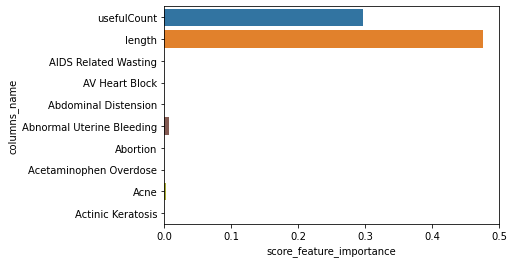

In [70]:
plot = sns.barplot(x=df.score_feature_importance, y=df.columns_name[:10])

In [ ]:
#KNN

In [74]:
y

0         1
1         1
2         0
3         1
4         1
         ..
215058    1
215059    1
215060    1
215061    0
215062    1
Name: rating, Length: 215063, dtype: int64

In [72]:
trans = PowerTransformer()
trans.fit(X_train)

X_train_knn = trans.transform(X_train)
X_test_knn  = trans.transform(X_test)

X_train_knn = pd.DataFrame(X_train, columns = X.columns)
X_test_knn  = pd.DataFrame(X_test,  columns = X.columns)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_knn, y_train)
y_pred_train_knn = neigh.predict(X_train_knn)
y_pred_test_knn = neigh.predict(X_test_knn)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_knn,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_knn, pos_label="Yes")]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_knn,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(neigh,X_test_knn,y_test, values_format = 'd')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KeyboardInterrupt: 

In [ ]:
plot = sns.barplot(x=df.score_feature_importance, y=df.columns_name)